In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
from tensorflow import keras
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers
import matplotlib.pyplot as plt

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
    
# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2024-02-11 19:49:59.699013: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-02-11 19:49:59.699145: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-02-11 19:49:59.857532: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [2]:
train_data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")
print(train_data.shape)
train_data.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
test_data = pd.read_csv("/kaggle/input/digit-recognizer/test.csv")
print(test_data.shape)
test_data.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
X_train = (train_data.iloc[:,1:].values).astype('float32') # all pixel values
y_train = train_data.iloc[:,0].values.astype('int16')

print(X_train.shape)
print(y_train.shape)
y_train

(42000, 784)
(42000,)


array([1, 0, 1, ..., 7, 6, 9], dtype=int16)

(42000, 28, 28)


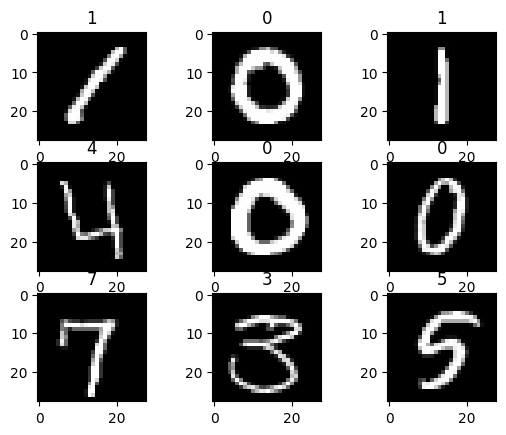

In [5]:
X_train = X_train.reshape(-1, 28, 28)
print(X_train.shape)

for i in range(0, 9):
    plt.subplot(330 + (i+1))
    plt.imshow(X_train[i], cmap=plt.get_cmap('gray'))
    plt.title(y_train[i])

In [6]:
X_test = test_data.values.astype('float32')
X_test = X_test.reshape(-1,28,28)

In [7]:
X_test.shape

(28000, 28, 28)

In [8]:
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
X=X_train
y=y_train
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.10, random_state=0)

In [10]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # input layer (1)
    keras.layers.Dense(128, activation='relu'),  # hidden layer (2)
    keras.layers.Dense(10, activation='softmax') # output layer (3)
])

In [11]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'])

early_stopping = keras.callbacks.EarlyStopping(
    patience=10,
    min_delta=0.001,
    restore_best_weights=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val,y_val),
    batch_size=512,
    epochs=1000,
    callbacks=[early_stopping])

Epoch 1/1000
74/74 [==============================] - 1s 10ms/step - loss: 0.7517 - accuracy: 0.7986 - val_loss: 0.3508 - val_accuracy: 0.9021
Epoch 2/1000
74/74 [==============================] - 1s 7ms/step - loss: 0.3015 - accuracy: 0.9158 - val_loss: 0.2848 - val_accuracy: 0.9210
Epoch 3/1000
74/74 [==============================] - 1s 7ms/step - loss: 0.2435 - accuracy: 0.9311 - val_loss: 0.2415 - val_accuracy: 0.9348
Epoch 4/1000
74/74 [==============================] - 0s 6ms/step - loss: 0.2053 - accuracy: 0.9434 - val_loss: 0.2187 - val_accuracy: 0.9426
Epoch 5/1000
74/74 [==============================] - 1s 7ms/step - loss: 0.1767 - accuracy: 0.9497 - val_loss: 0.1952 - val_accuracy: 0.9455
Epoch 6/1000
74/74 [==============================] - 0s 6ms/step - loss: 0.1533 - accuracy: 0.9568 - val_loss: 0.1791 - val_accuracy: 0.9514
Epoch 7/1000
74/74 [==============================] - 0s 7ms/step - loss: 0.1357 - accuracy: 0.9618 - val_loss: 0.1675 - val_accuracy: 0.9538
Epoch

In [12]:
predictions = model.predict(X_val)

132/132 [==============================] - 0s 2ms/step


In [13]:
# def show_image(img):
#   plt.figure()
#   plt.imshow(img, cmap=plt.cm.binary)
#   plt.grid(False)
#   plt.show()
  
# def get_number():
#   while True:
#     num = input("Pick a number: ")
#     if num.isdigit():
#       num = int(num)
#       if 0 <= num < 4200:
#         return int(num)
#       else:
#         print("Try again...")
#     else:
#         print("Try again...")

# num = get_number()
# show_image(X_val[num])
# print(np.argmax(predictions[num]))
# print(y_val[num])

In [14]:
predictions = np.argmax(predictions, axis = 1)
predictions = pd.Series(predictions,name = "Label")

In [15]:
submission = pd.concat([pd.Series(range(1,28001), name = "ImageId"),predictions],axis = 1)
submission.to_csv("DR.csv", index = False)